In [4]:
import pandas as pd
import io
import requests

url = "https://raw.githubusercontent.com/arguz95/Project_ML2/main/Data/bankrupcy.csv"
download = requests.get(url).content

bankruptcy = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [5]:
bankruptcy

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [6]:
bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
bankruptcy.isnull().sum().sort_values(ascending = False)
# It means no NaN values in the dataframe.

 Equity to Liability                      0
 Net Income Flag                          0
 Operating Profit Growth Rate             0
 After-tax Net Profit Growth Rate         0
 Regular Net Profit Growth Rate           0
                                         ..
 Current Liabilities/Equity               0
 Long-term Liability to Current Assets    0
 Retained Earnings to Total Assets        0
 Total income/Total expense               0
Bankrupt?                                 0
Length: 96, dtype: int64

In [8]:
bankruptcy[' Net Income Flag'].nunique()
# Column ` Net Income Flag` only has one value, so we can drop it.

1

In [9]:
bankruptcy_drop = bankruptcy.drop([' Net Income Flag'], axis=1)
#need to drop all other useless/correlated columns too

In [14]:
#%matplotlib inline
#import seaborn as sns; sns.set()
#sns.pairplot(df, hue='Churn', height=2);
#this hoe takes forever to run so I just killed it. This is just to vizualize data

In [15]:
#Variable creation
x_raw = bankruptcy_drop.drop(['Bankrupt?'], axis=1)
y = bankruptcy['Bankrupt?']
x_col = [x_raw.columns]

In [34]:
#Scaling
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_scaled = scaler.fit_transform(x_raw)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

x_scaled = num_pipeline.fit_transform(x_raw)

In [17]:
x_pd = pd.DataFrame(x_scaled)
x_pd.columns = x_col
x_pd.apply(pd.to_numeric)

ROA(C) before interest and depreciation before interest  \
0                                             -2.217909         
1                                             -0.673828         
2                                             -1.303672         
3                                             -1.735886         
4                                             -0.661778         
...                                                 ...         
6814                                          -0.189395         
6815                                          -0.494676         
6816                                          -0.534845         
6817                                           0.017875         
6818                                          -0.199839         

      ROA(A) before interest and % after tax  \
0                                  -2.045798   
1                                  -0.311068   
2                                  -0.908420   
3                                  -1.636209   
4                                  -0.307745   
...                                      ...   
6814                               -0.291959   
6815                               -0.310237   
6816                               -0.379194   
6817                                0.019594   
6818                                0.174956   

      ROA(B) before interest and depreciation after tax  \
0                                             -2.400361   
1                                             -0.598450   
2                                             -1.319910   
3                                             -1.556340   
4                                             -0.508050   
...                                                 ...   
6814                                          -0.168181   
6815                                          -0.477627   
6816                                          -0.534996   
6817                                           0.007403   
6818                                          -0.065612   

      Operating Gross Margin  Realized Sales Gross Margin  \
0                  -0.383334                    -0.382638   
1                   0.135068                     0.136307   
2                  -0.383759                    -0.388177   
3                  -1.441418                    -1.441832   
4                  -0.541238                    -0.540708   
...                      ...                          ...   
6814               -0.206277                    -0.204969   
6815               -0.569328                    -0.568828   
6816                0.147411                     0.135029   
6817               -0.005811                    -0.004720   
6818                1.149313                     1.151617   

      Operating Profit Rate  Pre-tax net Interest Rate  \
0                  0.016456                  -0.023516   
1                  0.014671                   0.014799   
2                  0.007858                  -0.061111   
3                 -0.004257                  -0.017313   
4                  0.016758                   0.013703   
...                     ...                        ...   
6814               0.018215                   0.017036   
6815               0.018223                   0.017455   
6816               0.017628                   0.016412   
6817               0.024494                   0.024099   
6818              -0.051874                   0.372776   

      After-tax net Interest Rate  \
0                       -0.020165   
1                        0.015966   
2                       -0.051183   
3                       -0.008676   
4                        0.016186   
...                           ...   
6814                     0.018197   
6815                     0.017919   
6816                     0.017153   
6817                     0.023223   
6818                     0.346771   

      Non-industry income and expenditure/revenue  \
0          

In [18]:
import numpy as np
corr_matrix = np.corrcoef(x_pd).round(decimals=2)
print(corr_matrix)

[[ 1.    0.2   0.27 ... -0.32 -0.18 -0.19]
 [ 0.2   1.    0.08 ... -0.05 -0.06 -0.06]
 [ 0.27  0.08  1.   ... -0.03 -0.08 -0.04]
 ...
 [-0.32 -0.05 -0.03 ...  1.    0.18  0.29]
 [-0.18 -0.06 -0.08 ...  0.18  1.   -0.02]
 [-0.19 -0.06 -0.04 ...  0.29 -0.02  1.  ]]


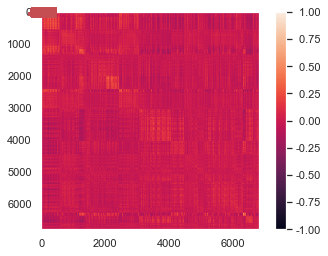

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
#ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
#ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
#ax.set_ylim(2.5, -0.5)
for i in range(len(x_pd.columns)):
    for j in range(len(x_pd.columns)):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

In [20]:
#Anomaly Detection
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100,contamination=0.01)
pred = iforest.fit_predict(x_pd)
score = iforest.decision_function(x_pd)
from numpy import where
anom_index = where(pred==-1)
values = x_pd.iloc[anom_index]
values
for i in values.index:
    x_pd = x_pd.drop(i)
    y = y.drop(i)

In [21]:
x_pd.head()

ROA(C) before interest and depreciation before interest  \
0                                          -2.217909         
1                                          -0.673828         
2                                          -1.303672         
3                                          -1.735886         
4                                          -0.661778         

   ROA(A) before interest and % after tax  \
0                               -2.045798   
1                               -0.311068   
2                               -0.908420   
3                               -1.636209   
4                               -0.307745   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                          -2.400361               -0.383334   
1                                          -0.598450                0.135068   
2                                          -1.319910               -0.383759   
3                                          -1.556340               -1.441418   
4                                          -0.508050               -0.541238   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                    -0.382638               0.016456   
1                     0.136307               0.014671   
2                    -0.388177               0.007858   
3                    -1.441832              -0.004257   
4                    -0.540708               0.016758   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                  -0.023516                    -0.020165   
1                   0.014799                     0.015966   
2                  -0.061111                    -0.051183   
3                  -0.017313                    -0.008676   
4                   0.013703                     0.016186   

   Non-industry income and expenditure/revenue  \
0                                    -0.087479   
1                                    -0.005957   
2                                    -0.142238   
3                                    -0.024491   
4                                    -0.013254   

   Continuous interest rate (after tax)  ...  Liability-Assets Flag  \
0                             -0.031281  ...              -0.034272   
1                              0.009823  ...              -0.034272   
2                             -0.086566  ...              -0.034272   
3                             -0.011077  ...              -0.034272   
4                              0.013300  ...              -0.034272   

   Net Income to Total Assets  Total assets to GNP price  No-credit Interval  \
0                   -2.254317                  -0.049491           -0.084274   
1                   -0.309033                  -0.049491           -0.021388   
2                   -0.820510                  -0.049491           -0.005984   
3                   -1.691222                  -0.049491           -0.080226   
4                   -0.316008                  -0.049491           -0.032052   

   Gross Profit to Sales  Net Income to Stockholder's Equity  \
0              -0.383465                           -0.861611   
1               0.135253                           -0.029804   
2              -0.383698                           -0.249820   
3              -1.441526                           -0.392864   
4              -0.541255                           -0.029564   

   Liability to Equity  Degree of Financial Leverage (DFL)  \
0             0.680171                           -0.060031   
1             0.240685                           15.129816   
2             0.679247                           -0.062961   
3             0.093765                           -0.053903   
4            -0.128014                           -0.178037   

   Interest Coverage Ratio (Interest expense to EBIT)  Equity to Liability  
0                                          -0.098978             -0.622067  
1                                           0.3

In [22]:
x_pd.shape

(6750, 94)

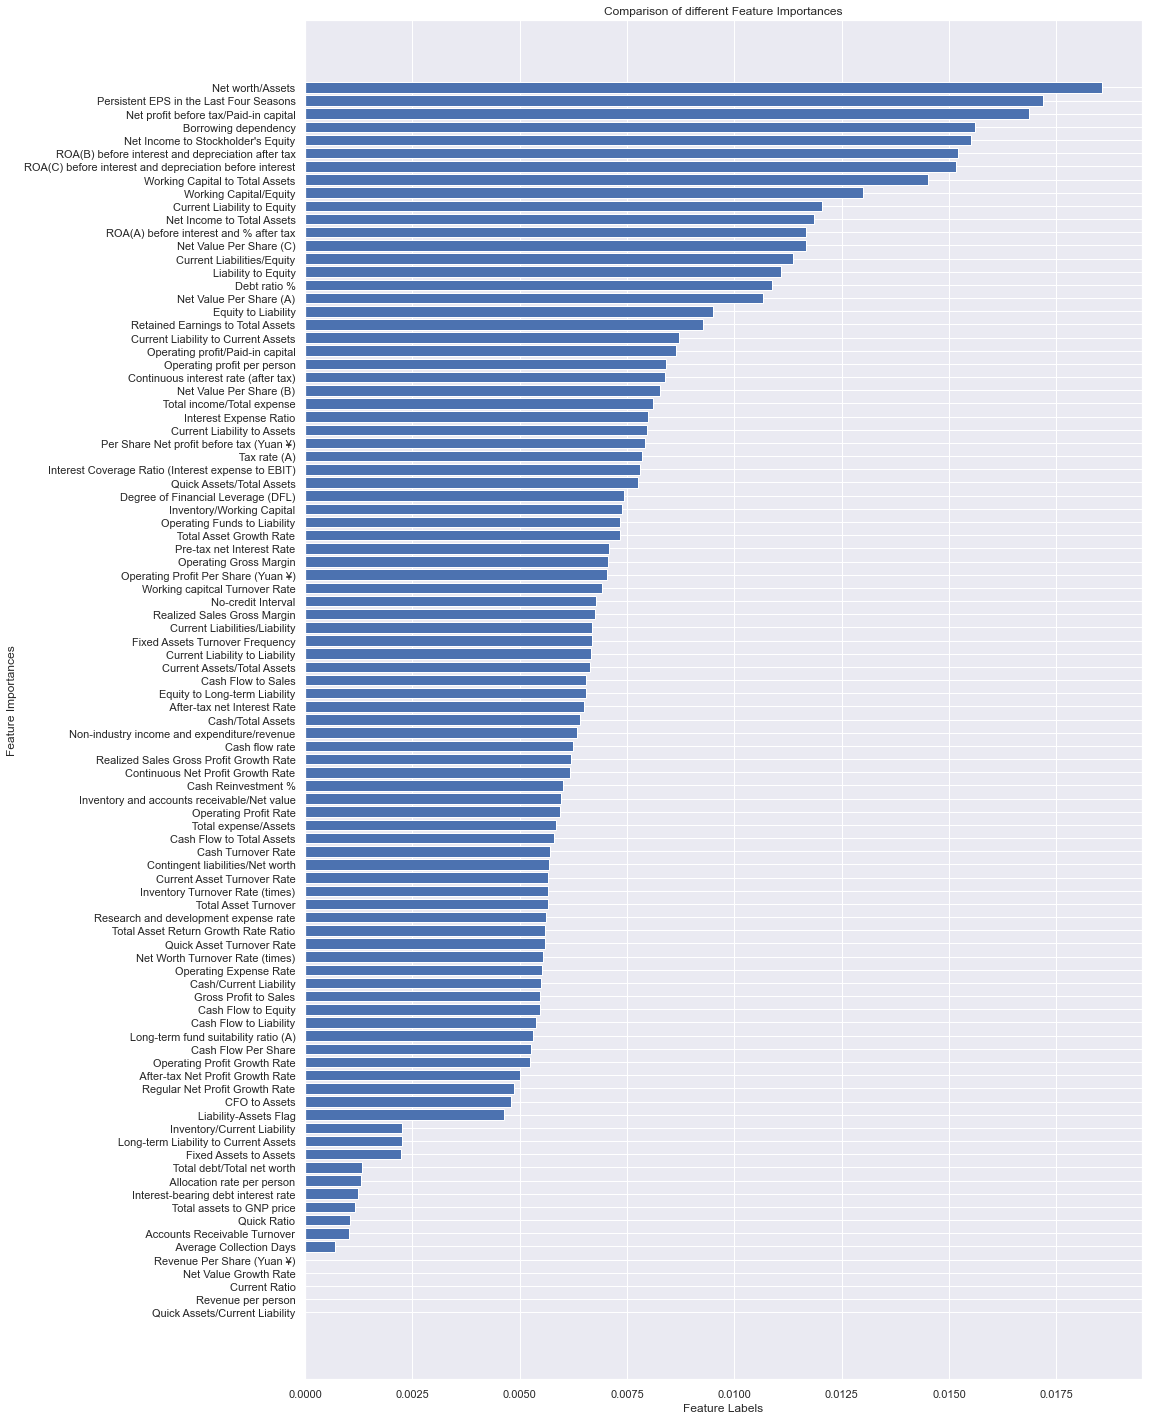

In [23]:
# Tree-based Feature importance
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

clf = ExtraTreesClassifier(n_estimators=50, random_state=45)
clf = clf.fit(x_pd, y)
feature_importance = clf.feature_importances_
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        clf.estimators_], 
                                        axis = 0) 

tbfs = pd.DataFrame(
    {"X": x_raw.columns, "FI": feature_importance_normalized}
)

tbfs = tbfs.sort_values('FI',ascending=True)


# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(15,25))
plt.barh(y=tbfs['X'],width=tbfs['FI']) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

In [24]:
# show the table results of predictors and feature importance
clf_df = pd.DataFrame(x_raw.columns,columns=['X'])
clf_df['feature_importance']=feature_importance_normalized
clf_df = clf_df.sort_values(by='feature_importance',ascending=False)
clf_df.head(30)

X  feature_importance
37                                   Net worth/Assets            0.018566
18            Persistent EPS in the Last Four Seasons            0.017192
42              Net profit before tax/Paid-in capital            0.016865
39                               Borrowing dependency            0.015601
89                 Net Income to Stockholder's Equity            0.015520
2    ROA(B) before interest and depreciation after...            0.015208
0    ROA(C) before interest and depreciation befor...            0.015166
53                    Working Capital to Total Assets            0.014503
64                             Working Capital/Equity            0.012997
77                        Current Liability to Equity            0.012048
85                         Net Income to Total Assets            0.011849
1              ROA(A) before interest and % after tax            0.011679
17                            Net Value Per Share (C)            0.011673
65                         Current Liabilities/Equity            0.011365
90                                Liability to Equity            0.011093
36                                       Debt ratio %            0.010870
16                            Net Value Per Share (A)            0.010665
93                                Equity to Liability            0.009514
67                  Retained Earnings to Total Assets            0.009259
83                Current Liability to Current Assets            0.008721
41                   Operating profit/Paid-in capital            0.008643
51                        Operating profit per person            0.008400
9                Continuous interest rate (after tax)            0.008386
15                            Net Value Per Share (B)            0.008277
68                         Total income/Total expense            0.008112
34                             Interest Expense Ratio            0.007995
59                        Current Liability to Assets            0.007972
22           Per Share Net profit before tax (Yuan ¥)            0.007914
14                                       Tax rate (A)            0.007844
92   Interest Coverage Ratio (Interest expense to ...            0.007800

In [25]:
clf_df.tail(10)

X  feature_importance
13   Interest-bearing debt interest rate            0.001236
86             Total assets to GNP price            0.001172
33                           Quick Ratio            0.001056
45          Accounts Receivable Turnover            0.001032
46               Average Collection Days            0.000702
50                    Revenue per person            0.000000
29                 Net Value Growth Rate            0.000000
57        Quick Assets/Current Liability            0.000000
32                         Current Ratio            0.000000
20            Revenue Per Share (Yuan ¥)            0.000000

### Base Model

In [59]:
# confirm the columns of x 
X_finalized = x_pd.drop(columns=[' Quick Assets/Current Liability',' Liability-Assets Flag',' Revenue per person',
                                 ' Net Value Growth Rate',' Revenue Per Share (Yuan ¥)'])

In [60]:
X_finalized.shape

(6750, 89)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_finalized, y, test_size=0.2, random_state=101)

In [31]:
# Find some classification models and check their baseline accuracy with 10 CV folds

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def get_model():
    models = []
    models.append(('LR' , LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('RF' , RandomForestClassifier(n_estimators=100)))
    models.append(('MLP', MLPClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    return models

def bl_performance(X_train, y_train,models):
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=101)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('{}: CV accuracy mean: {:.4}'.format(name, cv_results.mean()))
        
    return names, results

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results = bl_performance(X_train, y_train,models)

### Preliminary Model Testing

In [26]:
sel_features = clf_df['X'].head(5)

In [29]:
X_prelim = bankruptcy[sel_features]
y_prelim = bankruptcy['Bankrupt?']

In [44]:
X_prelim_scaled = num_pipeline.fit_transform(X_prelim)

In [45]:
X_prelim_scaled.shape

(6819, 5)

In [46]:
LDA = LinearDiscriminantAnalysis()

In [47]:
LDA.fit(X_prelim,y_prelim)

LinearDiscriminantAnalysis()

In [49]:
import pickle as pkl
pkl.dump(LDA, open('model_v1.pkl','wb'))

In [50]:
sel_features

37                            Net worth/Assets
18     Persistent EPS in the Last Four Seasons
42       Net profit before tax/Paid-in capital
39                        Borrowing dependency
89          Net Income to Stockholder's Equity
Name: X, dtype: object